# package_LAB

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_LAB
from importlib import reload
package_LAB = reload(package_LAB)
from package_LAB import SelectPath_RT, Delay_RT, LEAD_LAG_RT, IMC_TUNING, PID_RT, Bode_TF, Process, Bode_Ls, Stability_Margins

# LEAD_LAG_RT()

In [25]:
help(LEAD_LAG_RT)

Help on function LEAD_LAG_RT in module package_LAB:

LEAD_LAG_RT(MV, Kp, Tlead, Tlag, Ts, PV, PVInit=0, method='EBD')
    The function "LeadLag_RT" needs to be included in a "for or while loop". 
    
    :MV: input vector
    :Kp: process gain
    :Tlead: lead time constant [s]
    :Tlag: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoidal method
        
    The function appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0.0, 100.0)

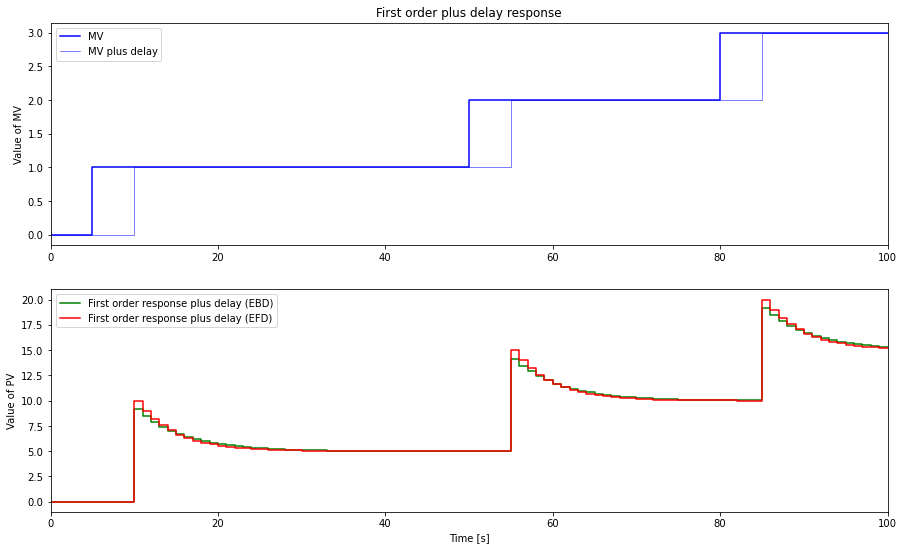

In [26]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 5
T_lag = 5
T_lead = 10
theta = 5

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LEAD_LAG_RT(MVDelay,Kp,T_lead,T_lag,Ts,PV_EBD)
    LEAD_LAG_RT(MVDelay,Kp,T_lead,T_lag,Ts,PV_EFD,0,'EFD')
    #FO_RT(MVDelay,Kp,T,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='First order response plus delay (EBD)',where='post')
plt.step(t,PV_EFD,'r-',label='First order response plus delay (EFD)',where='post')
#plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

# PID_RT()

In [27]:
help(PID_RT)

Help on function PID_RT in module package_LAB:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
    The function "PID_RT" needs to be included in a "for or while loop".
    
    :SP: SP (or SetPoint) vector
    :PV: PV (or Process Value) vector
    :Man: Man (or Manual controller mode) vector (True or False)
    :MVMan: MVMan (or Manual value for MV) vector
    :MVFF: MVFF (or Feedforward) vector
    
    
    :Kc: controller gain
    :Ti: integral time constant [s]
    :Td: derivative time constant [s]
    :alpha: Tfd = alpha*Td where Tfd is the derivative filter time constant [s]
    :Ts: sampling period [s]
    
    :MVMin: minimum value for MV (used for saturation and anti wind-up)
    :MVMax: maximum value for MV (used for saturation and anti wind-up)
    
    :MV: MV (or Manipulated Value) vector
    :MVP: MVP (or Propotional part of MV) vector
    :MVI: MVI (or Integral part of MV) vector
    :M

(0.0, 50.0)

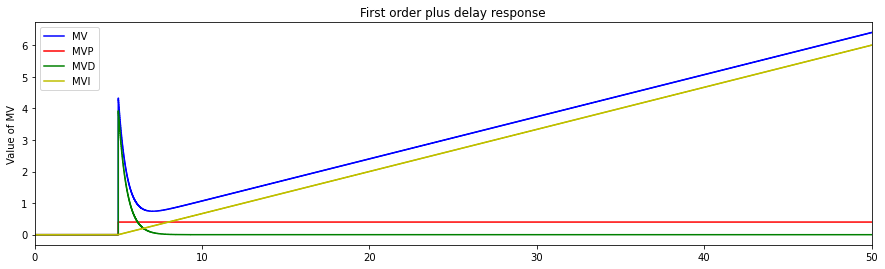

In [28]:
SP = []
PV = []
Man = [1]
MVMan = []
MVFF = [1]
Man[0] = False
MVFF[0] = 0

Kc = 0.4
Ti = 3
Td = 5
alpha = 0.1
Ts = 0.01

TSim=50
t = []
DV = []

MVMin = 0
MVMax = 100

MV = []
MVP = []
MVI = []
MVD = []
E = []


method = ''

SPPath = {0: 0, 5:1}
DVPath = {0: 0, 50: 0}

for i in range(0,int(TSim/Ts)+1):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(DVPath,t,DV)
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')

plt.figure(figsize = (15,9))
plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVP,'r-',label='MVP',where='post')
plt.step(t,MVD,'g-',label='MVD',where='post')
plt.step(t,MVI,'y-',label='MVI',where='post')
#plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

# Bode_TF

In [29]:
help(Bode_TF)

Help on function Bode_TF in module package_LAB:

Bode_TF(P, omega)
    :P: Process as defined by the class "Process".
        Use the following command to define the default process which is simply a unit gain process:
            P = Process({})
        
        A delay and two lag time constants can be added
        
        Use the following commands for a SOPDT process:
            P.parameters['Kp'] = 1.1
            P.parameters['Tlag1'] = 10.0
            P.parameters['Tlag2'] = 2.0
            P.parameters['theta'] = 2.0
        
        Use the following commands for a FOPD process:
            P.parameters['Kp'] = 1.1
            P.parameters['Tlag1'] = 10.0
            P.parameters['theta'] = 2.0
        
    :omega: frequency vector (rad/s); generated by a command of the type "omega = np.logspace(-2, 2, 10000)".
    Ps (P(j omega)) (vector of complex numbers) is returned.



In [30]:
P1 = Process({})
P2 = Process({})

P1.parameters['Kp'] = 1
P1.parameters['Tlag1'] = 1004.3
P1.parameters['theta'] = 10.2

P2.parameters['Kp'] = 0.54
P2.parameters['Tlag1'] = 135.6
P2.parameters['Tlag2'] = 5

omega = np.logspace(-4, 1, 10000)

b1 = Bode_TF(P1, omega)
b2 = Bode_TF(P2, omega)

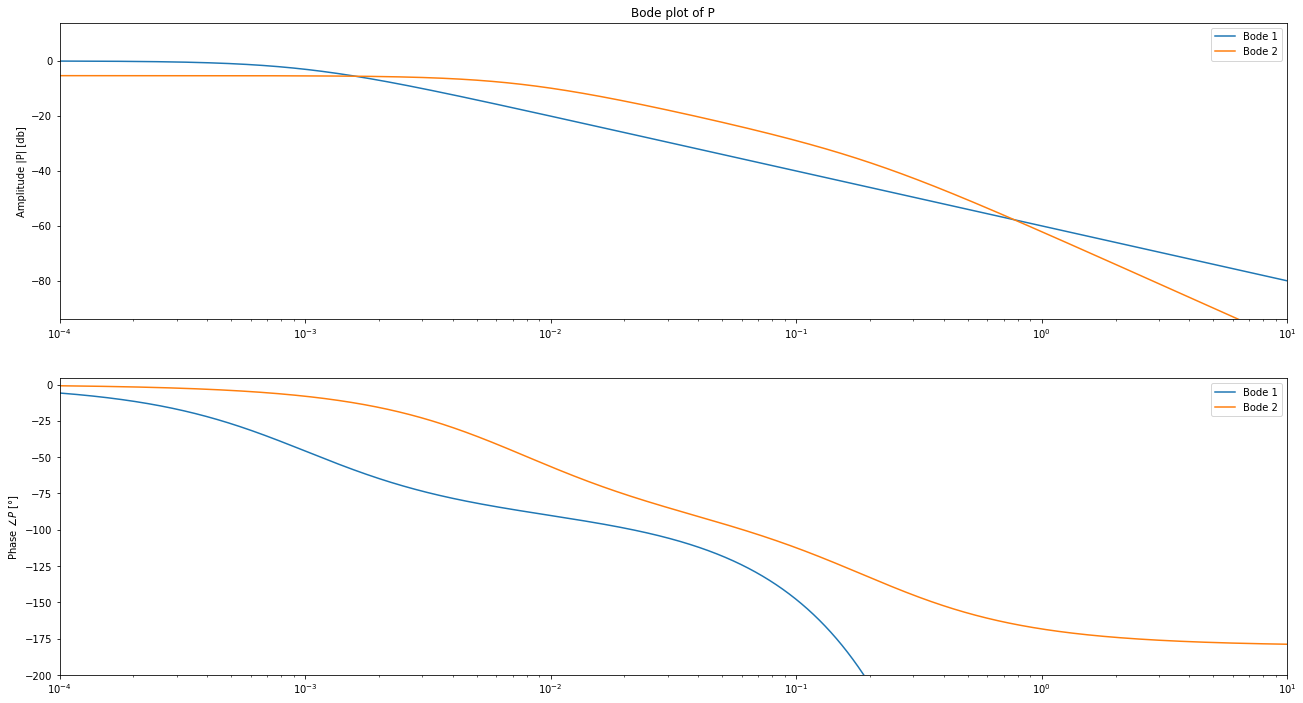

In [31]:
fig, (ax_gain, ax_phase) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)


ax_gain.semilogx(omega,20*np.log10(np.abs(b1)),label='Bode 1')
ax_gain.semilogx(omega,20*np.log10(np.abs(b2)),label='Bode 2')



gain_min = np.min(20*np.log10(np.abs(b1)/5))
gain_max = np.max(20*np.log10(np.abs(b1)*5))
ax_gain.set_xlim([np.min(omega), np.max(omega)])
ax_gain.set_ylim([gain_min, gain_max])
ax_gain.set_ylabel('Amplitude |P| [db]')
ax_gain.set_title('Bode plot of P')
ax_gain.legend(loc='best')

ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(b1)),label='Bode 1')
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(b2)),label='Bode 2')



ax_phase.set_xlim([np.min(omega), np.max(omega)])
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(b1))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(b1))) + 10
ax_phase.set_ylim([np.max([ph_min, -200]), ph_max])
ax_phase.set_ylabel(r'Phase $\angle P$ [°]')
ax_phase.legend(loc='best')

# IMC_TUNING()

In [32]:
help(IMC_TUNING)

Help on function IMC_TUNING in module package_LAB:

IMC_TUNING(gamma, Kp, T1, T2, theta, method='FOPD-PID')
    :Kc: controller gain
    :T1: first time constant [s]
    :T2: second time constant [s]
    :T_olp: open-loop time constant [s]
    :Tc: closed-loop time constant [s]
    :gamma: Tc factor
    :Ti: integral time constant [s]
    :Td: derivative time constant [s]
    :Kp: process gain
    :theta: delay
    :method: type of the transfer function and control method (optional: default value is 'FOPD_PID')
        'FO-PI': first order, PI controller
        'SO-PID': second order, PID controller
        'FOPD-PI': first order plus delay, PI controller
        'FOPD-PID': first order plus delay, PID controller
        'SOPD-PID': second order plus delay, PID controller
        
    The function "IMC_TUNING" calculates the best PID parameters for the process



In [33]:
Kp_p = 1
T1_p = 160.1
T2_p = 9.2
theta_p = 4.0
gamma = 0.5
alpha = 0.1

Kc, Ti, Td = IMC_TUNING(gamma, Kp_p, T1_p, T2_p, theta_p, method='SOPD-PID')

print(Kc)
print(Ti)
print(Td)

2.014277215942891
169.29999999999998
8.700059066745423


# Bode_LS()

In [34]:
help(Bode_Ls)

Help on function Bode_Ls in module package_LAB:

Bode_Ls(P, omega)
    :P: Process as defined by the class "Process".
        Use the following command to define the default process which is simply a unit gain process:
            P = Process({})
        
        A delay, 2 process time constants and the PID controller constants can be added.
        
        Use the following commands for the SOPDT process:
            P.parameters['Kp'] = Kp_p
            P.parameters['T1'] = T1_p
            P.parameters['T2'] = T2_p
            P.parameters['theta'] = theta_p
    
        Use the following commands for the PID Controller process:
            P.parameters['Kd'] = Td
            P.parameters['Kp_c'] = Kc
            P.parameters['Ki'] = Ti      
        
    :omega: frequency vector (rad/s); generated by a command of the type "omega = np.logspace(-5, 2, 70000)".
    
    The function "Bode_Ls" generates the Bode diagram of the process P



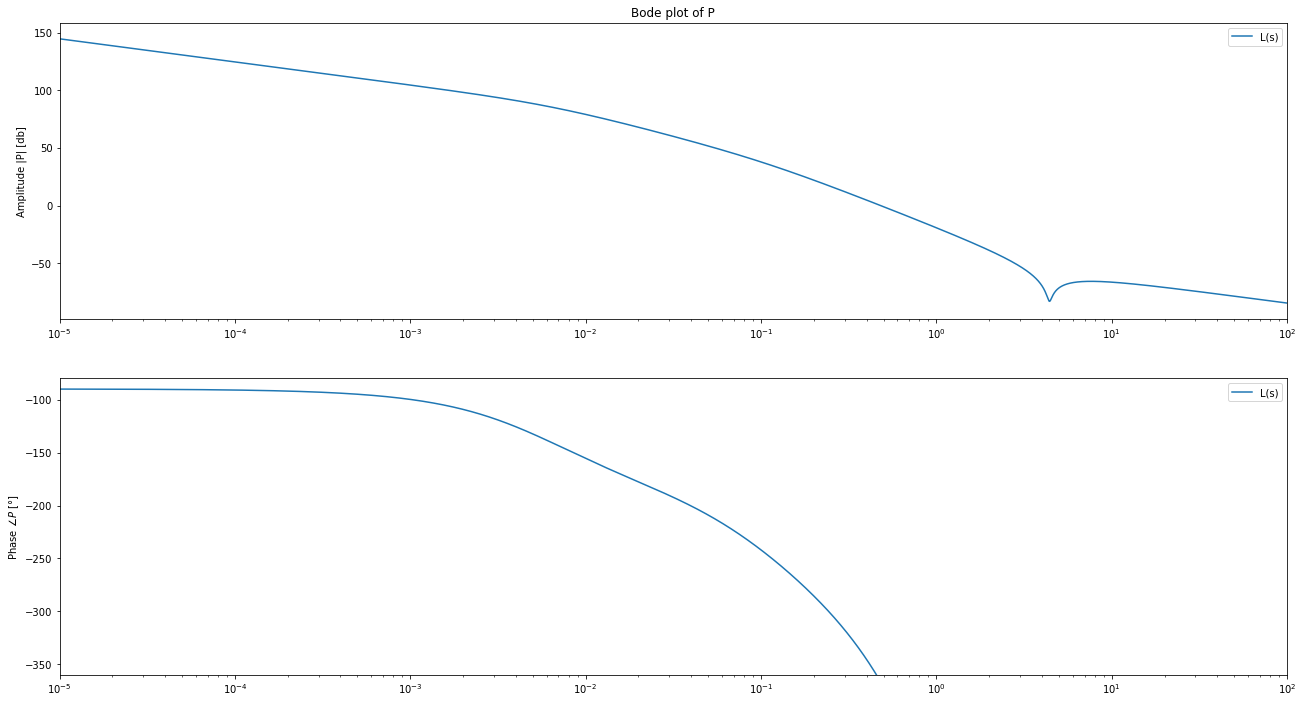

In [35]:
P3 = Process({}) 

P3.parameters['Kp'] = Kp_p
P3.parameters['T1'] = T1_p
P3.parameters['T2'] = T2_p
P3.parameters['theta'] = theta_p
P3.parameters['Kd'] = Td
P3.parameters['Kp_c'] = Kc
P3.parameters['Ki'] = Ti

omega = np.logspace(-5, 2, 70000)

Bode_Ls(P3,omega)

# Stability_Margins()

In [36]:
help(Stability_Margins)

Help on function Stability_Margins in module package_LAB:

Stability_Margins(P, omega)
    :P: Process as defined by the class "Process".
    :omega: frequency vector (rad/s); generated by a command of the type "omega = np.logspace(-5, 2, 70000)". 
    
    The function "Stability_Margins" returns the gain and phase margins of the L(s) transfer function. If one of the margins is infinite, returns inf



In [37]:
pm, gm =Stability_Margins(P3,omega)

print("The gain stability margin is " +str(pm)+ " dB")
print("The phase stability margin is " +str(gm)+ "°")

The gain stability margin is -66.61767295671052 dB
The phase stability margin is -186.23563624382365°
